# Project 7: Measuring worm length

In this project, the length of california blackworms (*Lumbriculus variegatus*) is measured in 6 well plates, which are detected automatically with the Hough Transform algorithm in `detect_mask`.

<div style="display: flex; flex-direction: row; text-align:left; gap: 10px;"  class="row">
    
<div class="col-md-6" style="flex: 1 1 0px;">
    
![Before](_figures/project_7_before.jpg)
    
**Input** - Worms placed in 6 well plates
    
</div>
<div class="col-md-6" style="flex: 1 1 0px;">

![After](_figures/project_7_after.jpg)
    
**Results** - wells and worm body length are detected automatically
</div>
</div>


## Background

Body length is a commonly measured trait. However, live animals are typically not well behaved in front of camera: typically the body is not aligned straight, which makes length measure difficult and sometimes time consuming. Some computer vision can help here, such as [skeletonization](https://en.wikipedia.org/wiki/Topological_skeleton) for an acurate semi automatic approach, and polyline drawing for a less acurate, manual aproach. phenopype's `detect_mask` can automatically detect geometric objects using [Hough transformation](https://en.wikipedia.org/wiki/Hough_transform). It takes a while to specific the right parameters for the circle detection - this configuration proved to be useful for the 6-well plates in the images (already preset in `gallery_project_7.yaml` in the template repo):

```python
- detect_mask:
    ANNOTATION: {type: mask, id: a, edit: overwrite}
    shape: circle
    circle_args: {max_radius: 300, min_radius: 220, param2: 90, param1: 100, min_dist: 400}
    resize: 0.5
```


## Preparation

In [1]:
import phenopype as pp
import os
import urllib.request

## change for your own machine
name_stub = "project_7"
working_dir = os.path.join(r"D:\workspace\git-repos\phenopype\phenopype-gallery\_temp", name_stub)
template_repo_path = r"D:\workspace\git-repos\phenopype\phenopype-templates"

## create dir, if not existent
if not os.path.isdir(working_dir):
    os.makedirs(working_dir)
os.chdir(working_dir)

## set template name 
template_name = "gallery_" + name_stub + ".yaml"

## download Pype-template from online-repo ...
try:
    url = "https://raw.githubusercontent.com/phenopype/phenopype-templates/main/templates/gallery/" + template_name
    urllib.request.urlretrieve(url, template_name)
    if os.path.isfile(template_name):
        template_path = template_name
except:
    print("could not retrieve template from online repo")

## ... or provide link to downloaded phenopype-templates repo (exchange for your own directory)
if os.path.isdir(template_repo_path):
    if "templates" in os.listdir(template_repo_path):
        template_path = os.path.join(template_repo_path, r"templates\gallery", template_name)
        
## confirm template exists
if os.path.isfile(template_path):
    print(os.path.abspath(template_path))
else:
    print("something went wrong - could not find template")

D:\workspace\git-repos\phenopype\phenopype-templates\templates\gallery\gallery_project_7.yaml


In [2]:
proj = pp.Project("project")

--------------------------------------------
Found existing project root directory - loading from:
D:\workspace\git-repos\phenopype\phenopype-gallery\_temp\project_7\project

Project "project" successfully loaded with 3 images
--------------------------------------------


In [3]:
proj.add_files(image_dir = r"../../gallery/data", include="worms")

--------------------------------------------
phenopype will search for image files at

D:\workspace\git-repos\phenopype\phenopype-gallery\gallery\data

using the following settings:

filetypes: ['jpg', 'JPG', 'jpeg', 'JPEG', 'tif', 'png', 'bmp'], include: worms, exclude: [], mode: copy, recursive: False, resize: False, unique: path

Found image worms1.jpg - 0__worms1 already exists (overwrite=False)
Found image worms2.jpg - 0__worms2 already exists (overwrite=False)
Found image worms3.jpg - 0__worms3 already exists (overwrite=False)

Found 3 files
--------------------------------------------


In [4]:
## add the config template; provide a tag
proj.add_config(template_path=template_path, tag="v1")

- template saved under D:\workspace\git-repos\phenopype\phenopype-gallery\_temp\project_7\project\data\0__worms1\pype_config_v1.yaml (overwritten)
- template saved under D:\workspace\git-repos\phenopype\phenopype-gallery\_temp\project_7\project\data\0__worms2\pype_config_v1.yaml (overwritten)
- template saved under D:\workspace\git-repos\phenopype\phenopype-gallery\_temp\project_7\project\data\0__worms3\pype_config_v1.yaml (overwritten)


In [5]:
## run image processing
for path in proj.dir_paths:
    pp.Pype(path, tag="v1")


Format path to abspath
- no annotation_type selected - returning all annotations

AUTOLOAD
- annotations loaded:
{
"mask": ["a"],
"contour": ["a", "b"],
"drawing": ["a"],
"line": ["a"]
}


------------+++ new pype iteration 2022-01-20 17:16:41 +++--------------




PREPROCESSING
detect_mask
- loaded existing annotation of type "mask" with ID "a": overwriting (edit=overwrite)
- decompose image: using gray channel
- found 1 contours that match criteria
- found 1 contours that match criteria
- found 1 contours that match criteria
- found 1 contours that match criteria
- found 1 contours that match criteria
- found 1 contours that match criteria
Found 6 circles
blur


SEGMENTATION
threshold
- multichannel image supplied, converting to grayscale
- decompose image: using gray channel
- including pixels from 6 drawn masks 
detect_contour
- loaded existing annotation of type "contour" with ID "a": overwriting (edit=overwrite)
- found 92 contours that match criteria
edit_contour
- loaded existi

In [7]:
## this collects all annotations 
proj.collect_results(tag="v1", files="annotations",  folder="annotations", overwrite=True)

Created D:\workspace\git-repos\phenopype\phenopype-gallery\_temp\project_7\project\results\annotations
Search string: ['annotations_v1']
Collected annotations_v1.json from 0__worms1
0__worms1_annotations_v1.json saved under D:\workspace\git-repos\phenopype\phenopype-gallery\_temp\project_7\project\results\annotations\0__worms1_annotations_v1.json.
Collected annotations_v1.json from 0__worms2
0__worms2_annotations_v1.json saved under D:\workspace\git-repos\phenopype\phenopype-gallery\_temp\project_7\project\results\annotations\0__worms2_annotations_v1.json.
Collected annotations_v1.json from 0__worms3
0__worms3_annotations_v1.json saved under D:\workspace\git-repos\phenopype\phenopype-gallery\_temp\project_7\project\results\annotations\0__worms3_annotations_v1.json.



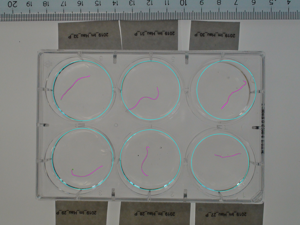
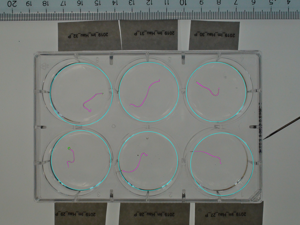
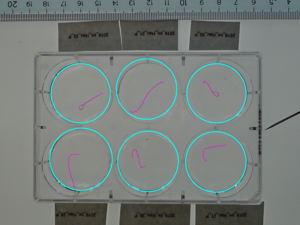


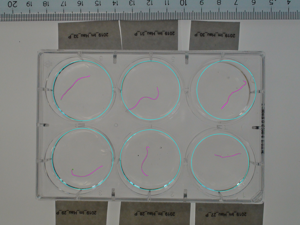
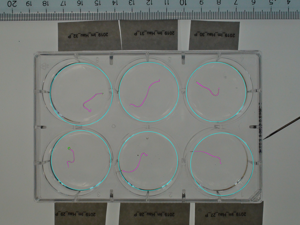
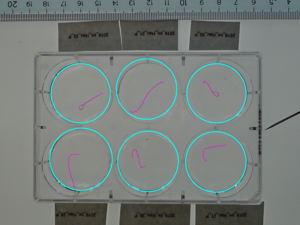

In [8]:
## display results
import ipyplot ## install with `pip install ipyplot`

canvas_list = []
for path in proj.dir_paths:
    canvas_list.append(pp.load_image(os.path.join(path, "canvas_v1.jpg"), mode="rgb"))

ipyplot.plot_images(canvas_list, img_width=300)